<a href="https://colab.research.google.com/github/galibisquit/Galib-Rizqi-Final-Project/blob/main/Finance_101_Capital_Asset_Pricing_Model_(CAPM)_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK #1: UNDERSTAND THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM)

![alt text](https://drive.google.com/uc?id=1rGljEUj4EEwo4Y9vzuXjM2le_tGC1NFy)

![alt text](https://drive.google.com/uc?id=1BYrA8caoVBNS0ZZusSas0u5y_o8N4c3f)

![alt text](https://drive.google.com/uc?id=1M5TERDwqNNTbV1a-_fLKWvdGcxHqNdKF)

![alt text](https://drive.google.com/uc?id=1KLHifTx79y-e2xrNPSZ-wY2tCrZEzVZC)

![alt text](https://drive.google.com/uc?id=1LIM_wMcQjcOh-4U3h_NXYM6fIborwJTp)

![alt text](https://drive.google.com/uc?id=1j8HYfvy6Gn0v3a8z5cnuL4p-CvcVa8Va)

![alt text](https://drive.google.com/uc?id=1_9Tw_D0MRDnbZ7huDDfnJbbhHZVhFvPb)

# TASK #2: IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [136]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yfinance as yf
import datetime as dt

In [137]:
# Define the tickers for ADRO.JK and JKLQ45 index
symbols = ['ADRO.JK', '^JKLQ45']

# Fetch historical data for the past 5 years
data = yf.download(symbols, period='5y')['Close']

# Rename columns to reflect tickers for clarity
data.columns = ['ADRO', 'LQ45']

# Display the first few rows of the closing prices
print(data.head())


[*********************100%***********************]  2 of 2 completed


                             ADRO        LQ45
Date                                         
2019-11-19 00:00:00+00:00  1320.0  985.900024
2019-11-20 00:00:00+00:00  1335.0  988.330017
2019-11-21 00:00:00+00:00  1310.0  980.320007
2019-11-22 00:00:00+00:00  1320.0  977.460022
2019-11-25 00:00:00+00:00  1310.0  967.760010


In [138]:
stocks_df = pd.DataFrame(data)
stocks_df

,ADRO,LQ45
Date,,
2019-11-19 00:00:00+00:00,1320.0,985.900024
2019-11-20 00:00:00+00:00,1335.0,988.330017
2019-11-21 00:00:00+00:00,1310.0,980.320007
2019-11-22 00:00:00+00:00,1320.0,977.460022
2019-11-25 00:00:00+00:00,1310.0,967.760010
...,...,...
2024-11-13 00:00:00+00:00,3920.0,886.460022
2024-11-14 00:00:00+00:00,3830.0,875.700012
2024-11-15 00:00:00+00:00,3920.0,871.690002


In [139]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,ADRO,LQ45
Date,,
2019-11-19 00:00:00+00:00,1320.0,985.900024
2019-11-20 00:00:00+00:00,1335.0,988.330017
2019-11-21 00:00:00+00:00,1310.0,980.320007
2019-11-22 00:00:00+00:00,1320.0,977.460022
2019-11-25 00:00:00+00:00,1310.0,967.760010
...,...,...
2024-11-13 00:00:00+00:00,3920.0,886.460022
2024-11-14 00:00:00+00:00,3830.0,875.700012
2024-11-15 00:00:00+00:00,3920.0,871.690002


In [140]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

**MINI CHALLENGE #1:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data**
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck**

# TASK #3: CALCULATE DAILY RETURNS

In [141]:
# Function to calculate the daily returns
def daily_return(df):

  df_daily_return = df.copy()

  # Loop through each stock
  for i in df.columns[1:]:

    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [142]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Streaming output truncated to the last 5000 lines.


<ipython-input-141-4a008fa2698e>:13: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

<ipython-input-141-4a008fa2698e>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-141-4a008fa2698e>:13: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we ar

,ADRO,LQ45
Date,,
2019-11-19 00:00:00+00:00,1320.0,0.000000
2019-11-20 00:00:00+00:00,1335.0,0.246475
2019-11-21 00:00:00+00:00,1310.0,-0.810459
2019-11-22 00:00:00+00:00,1320.0,-0.291740
2019-11-25 00:00:00+00:00,1310.0,-0.992369
...,...,...
2024-11-13 00:00:00+00:00,3920.0,0.219328
2024-11-14 00:00:00+00:00,3830.0,-1.213818
2024-11-15 00:00:00+00:00,3920.0,-0.457920


**MINI CHALLENGE #2:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


# TASK #4: CALCULATE BETA FOR A SINGLE STOCK

In [143]:
# Select any stock, let's say Apple
stocks_daily_return

,ADRO,LQ45
Date,,
2019-11-19 00:00:00+00:00,1320.0,0.000000
2019-11-20 00:00:00+00:00,1335.0,0.246475
2019-11-21 00:00:00+00:00,1310.0,-0.810459
2019-11-22 00:00:00+00:00,1320.0,-0.291740
2019-11-25 00:00:00+00:00,1310.0,-0.992369
...,...,...
2024-11-13 00:00:00+00:00,3920.0,0.219328
2024-11-14 00:00:00+00:00,3830.0,-1.213818
2024-11-15 00:00:00+00:00,3920.0,-0.457920


In [144]:
# Select the S&P500 (Market)
stocks_daily_return['ADRO']

,ADRO
Date,
2019-11-19 00:00:00+00:00,1320.0
2019-11-20 00:00:00+00:00,1335.0
2019-11-21 00:00:00+00:00,1310.0
2019-11-22 00:00:00+00:00,1320.0
2019-11-25 00:00:00+00:00,1310.0
...,...
2024-11-13 00:00:00+00:00,3920.0
2024-11-14 00:00:00+00:00,3830.0
2024-11-15 00:00:00+00:00,3920.0


<Axes: xlabel='LQ45', ylabel='ADRO'>

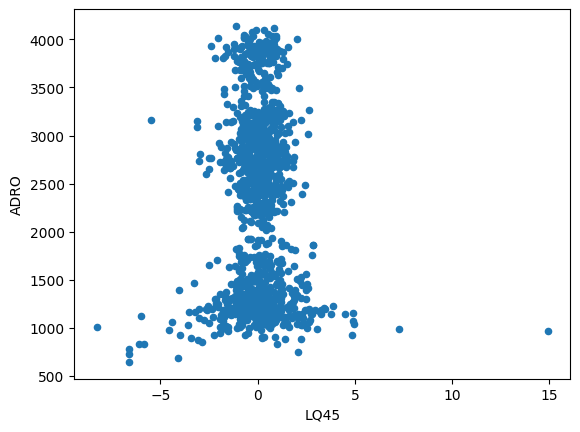

In [145]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'LQ45', y = 'ADRO')

In [146]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['LQ45'], stocks_daily_return['ADRO'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('ADRO', beta, alpha))

Beta for ADRO stock is = 2.542587436915063 and alpha is = 2266.5686470631713


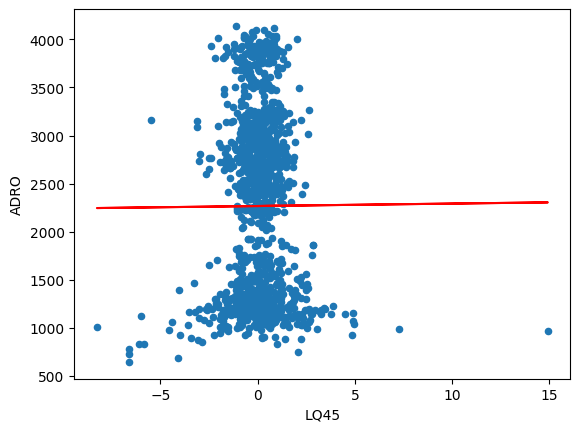

In [149]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'LQ45', y = 'ADRO')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['LQ45'], beta * stocks_daily_return['LQ45'] + alpha, '-', color = 'r')


**MINI CHALLENGE #3:**
- **Calculate Beta for Tesla Inc. and compare it with Apple**

# TASK #5: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [ ]:
beta

In [150]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['ADRO'].mean()

2266.56636438582

In [151]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['ADRO'].mean() * 252
rm

571174.7238252267

In [152]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM
ER_ADRO = rf + ( beta * (rm-rf) )

In [153]:
ER_ADRO

1452261.677081452

**MINI CHALLENGE #4:**
- **Apply CAPM formula to calculate the return for AT&T**  

# TASK #6: CALCULATE BETA FOR ALL STOCKS

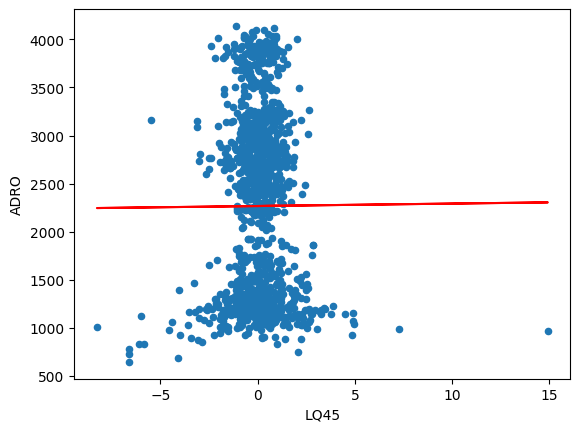

In [154]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns
  if i != 'Date' and i != 'LQ45':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'LQ45', y = i)

    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['LQ45'], stocks_daily_return[i], 1)

    plt.plot(stocks_daily_return['LQ45'], b * stocks_daily_return['LQ45'] + a, '-', color = 'r')

    beta[i] = b

    alpha[i] = a

    plt.show()

In [155]:
# Let's view Beta for every stock
beta

{'ADRO': 2.542587436915063}

In [156]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,”
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'ADRO': 2266.5686470631713}

**MINI CHALLENGE #5:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


# TASK #7: APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [157]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['ADRO']

In [158]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['LQ45'].mean() * 252 # this is the expected return of the market
rm

-0.2262398863548551

In [159]:
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

In [160]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for ADRO is -0.5752346927749461%


In [161]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [162]:
# Calculate the portfolio return
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

-0.575234692774946

In [163]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is -0.575234692774946%



**MINI CHALLENGE #6:**
- **Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon**


# **AWESOME JOB!**

# **MINI CHALLENGES SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data**
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck**

In [164]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [166]:
# Plot interactive chart
interactive_plot(stocks_df, 'ADRO')

KeyError: 'Date'

In [167]:
def interactive_plot(df, title):
  # Check if 'Date' column exists, if not, try variations or print column names for debugging
  if 'Date' not in df.columns:
    if 'date' in df.columns:
      date_column = 'date'
    elif 'Dates' in df.columns:
      date_column = 'Dates'
    elif 'DATE' in df.columns:
      date_column = 'DATE'
    else:
      print(f"Available columns: {df.columns}")
      raise KeyError("Date column not found. Please check the DataFrame columns.")
  else:
    date_column = 'Date'

  fig = px.line(title = title)
  for i in df.columns[1:]:
    # Use the identified date column
    fig.add_scatter(x = df[date_column], y = df[i], name = i)
  fig.show()

In [168]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

Available columns: Index(['ADRO', 'LQ45'], dtype='object')


<ipython-input-140-120d4a80aafe>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



KeyError: 'Date column not found. Please check the DataFrame columns.'

**MINI CHALLENGE #2 SOLUTION:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


In [ ]:
stocks_daily_return.mean()
# S&P500 average daily return is 0.049%
# Amazon average daily return is 0.15%
# Google average daily return is 0.084%

**MINI CHALLENGE #3 SOLUTION:**
- **Calculate Beta for Tesla Inc. and compare it with Apple**

In [ ]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print(beta)
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


**MINI CHALLENGE #4 SOLUTION:**
- **Apply CAPM formula to calculate the return for AT&T**  

In [ ]:
# You have to calculate Beta for Amazon first
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('T', beta, alpha))

In [ ]:
# Calculate return for AT&T using CAPM
ER_T = rf + ( beta * (rm - rf) )
print(ER_T)

**MINI CHALLENGE #5 SOLUTION:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [ ]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:

  if i != 'Date' and i != 'sp500':

    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)

    # Plot the straight line
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

**MINI CHALLENGE #6 SOLUTION:**
- **Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon**


In [ ]:
ER['AMZN']

In [ ]:
# Calculate the portfolio return
ER_portfolio = 0.5 * ER['AAPL'] +  0.5 * ER['AMZN']
ER_portfolio